# Differential Evolution

**Equations and pseudo code is taken from "Learning Algorithms and Neural Networks" notes written by Dr. Victor Parque.**

## Basic Differential Evolution Algorithm

For a population of $NP$ vectors $x_i$, each in $\mathbb{R}^D$, three randomly sampled vectors $x_{r1}$, $x_{r2}$ and $x_{r3}$, a mutant individual $v_t$ is calculated as follows:
$$
v = x_{r1} + F(x_{r2} - x_{r3})
$$
where $F$ is a scaling factor $\in [0, 1]$.

Then, a mutation vector $u$ is caluclated by randomly mutating random entries in $v$ as follows:

$$
e_{j} = 0\ if\ Rand \leq CR \ or\ j = Rand;\ 0\ otherwise
$$
$$
e = [e_1, e_2, \dots , e_D]
$$

Then

$$
u_t = x_i + e \dot (v - x_i)
$$

Finally,

$$
x_i^{new} = u \ if \ f(u) < f(x_i) \ ;\ 0\ otherwise.
$$

Algorithm Pseudo code:

```python
Generate initial population
Repeat:
    for each individual in population:
        randomly select x_r1, x_r2, x_r3 from the population
        Compute mutant v
        Compute trial u
        if f(u) < f(x):
            x = u
        
Until termination criteria ends
```

In [27]:
import numpy as np
from matplotlib import pyplot as plt

In [28]:
def f(x):
    return (4 - 2.1*x[:,0]**2+x[:,0]**4/3) * x[:,0]**2 + np.prod(x, axis=1) + \
            (-4+4*x[:,1]**2)*x[:,1]**2

In [31]:
NP = 100
D = 2
F = 0.9
CR = 0.2
lb = [-5] * D
ub = [5] * D
pop = np.random.uniform(lb, ub, size=(NP, D))

C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  """
C:\Users\osama\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: in the future negative indices will not be ignored by `numpy.delete`.
  """


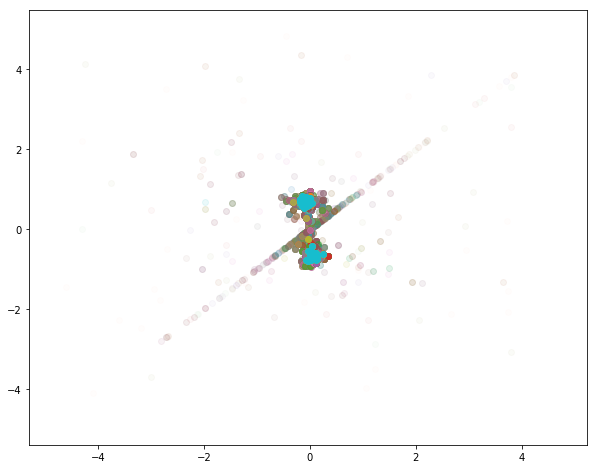

In [32]:
iterations = 100
plt.figure(figsize=(10,8))
for _ in range(iterations):
    for i, x in enumerate(pop):
        x1, x2, x3 = np.random.choice(np.delete(pop, x), replace=False, size=3)
        v = x1 + F*(x2 - x3)
        e = np.array([1 if np.random.rand() >= CR else 0 for _ in range(D)])
        u = x + e * (v - x)
        if f(u[None,:]) < f(x[None,:]):
            pop[i] = u
    plt.scatter(pop[:,0], pop[:,1], alpha=_/iterations)
plt.show()  